In [38]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
from astropy.io import fits
from astropy.table import Table
import pcmdpy as ppy
import easydarkfigs
import pandas as pd
from collections import defaultdict
from tqdm import tqdm
%matplotlib inline

In [2]:
import os, shutil
from glob import glob

In [3]:
%set_darkfigdir figures_dark/
%set_lightfigdir figures/

In [4]:
counts = defaultdict(int)
for infile in sorted(glob(os.path.join('../data/M87/raw/', 'j*_flc.fits'))):
    filt = fits.getval(infile, 'FILTER1')
    if 'CLEAR' in filt:
        filt = fits.getval(infile, 'FILTER2')
    targ = fits.getval(infile, 'TARGNAME')
    counts[filt] += 1
    newname = f'../data/M87/raw/M87_{filt:s}_EXP{counts[filt]:d}_flc.fits'
    if os.path.isfile(newname):
        raise FileExistsError(f'{newname} exists')
    os.rename(infile, newname)

In [5]:
vals = {}
for f in sorted(glob('../data/M87/raw/M87_F814W_EXP*_flc.fits')):
    asn = fits.getval(f, 'asn_id')
    if asn not in vals:
        vals[asn] = []
    vals[asn].append(f)

In [6]:
vals

{'J9E007010': ['../data/M87/raw/M87_F814W_EXP1_flc.fits',
  '../data/M87/raw/M87_F814W_EXP2_flc.fits',
  '../data/M87/raw/M87_F814W_EXP3_flc.fits',
  '../data/M87/raw/M87_F814W_EXP4_flc.fits'],
 'J9E015010': ['../data/M87/raw/M87_F814W_EXP5_flc.fits',
  '../data/M87/raw/M87_F814W_EXP6_flc.fits',
  '../data/M87/raw/M87_F814W_EXP7_flc.fits',
  '../data/M87/raw/M87_F814W_EXP8_flc.fits'],
 'J9E023010': ['../data/M87/raw/M87_F814W_EXP10_flc.fits',
  '../data/M87/raw/M87_F814W_EXP11_flc.fits',
  '../data/M87/raw/M87_F814W_EXP12_flc.fits',
  '../data/M87/raw/M87_F814W_EXP9_flc.fits'],
 'J9E031010': ['../data/M87/raw/M87_F814W_EXP13_flc.fits',
  '../data/M87/raw/M87_F814W_EXP14_flc.fits',
  '../data/M87/raw/M87_F814W_EXP15_flc.fits',
  '../data/M87/raw/M87_F814W_EXP16_flc.fits'],
 'J9E039010': ['../data/M87/raw/M87_F814W_EXP17_flc.fits',
  '../data/M87/raw/M87_F814W_EXP18_flc.fits',
  '../data/M87/raw/M87_F814W_EXP19_flc.fits',
  '../data/M87/raw/M87_F814W_EXP20_flc.fits'],
 'J9E047010': ['../

In [7]:
vals = {}
for f in sorted(glob('../data/M87/raw/M87_F606W_EXP*_flc.fits')):
    asn = fits.getval(f, 'ROOTNAME')
    if asn not in vals:
        vals[asn] = []
    vals[asn].append(f)

In [8]:
vals

{'j9e007lwq': ['../data/M87/raw/M87_F606W_EXP1_flc.fits'],
 'j9e015iyq': ['../data/M87/raw/M87_F606W_EXP2_flc.fits'],
 'j9e023llq': ['../data/M87/raw/M87_F606W_EXP3_flc.fits'],
 'j9e031ndq': ['../data/M87/raw/M87_F606W_EXP4_flc.fits'],
 'j9e039m9q': ['../data/M87/raw/M87_F606W_EXP5_flc.fits'],
 'j9e047onq': ['../data/M87/raw/M87_F606W_EXP6_flc.fits'],
 'j9e094giq': ['../data/M87/raw/M87_F606W_EXP7_flc.fits']}

In [9]:
vals = {}
for f in sorted(glob('../data/M87/raw/M87_F475W_EXP*_flc.fits')):
    asn = fits.getval(f, 'asn_id')
    if asn not in vals:
        vals[asn] = []
    vals[asn].append(f)

In [10]:
vals

{'J8FS02020': ['../data/M87/raw/M87_F475W_EXP1_flc.fits',
  '../data/M87/raw/M87_F475W_EXP2_flc.fits']}

In [11]:
files = {#'F475W': ['../data/M87/raw/M87_F475W_EXP{:d}_flc.fits'.format(i) for i in range(1, 3)],
         'F606W': ['../data/M87/raw/M87_F606W_EXP{:d}_flc.fits'.format(i) for i in range(1, 7)],
         'F814W': ['../data/M87/raw/M87_F814W_EXP{:d}_flc.fits'.format(i) for i in range(1, 9)]}
outputs = {#'F475W': '../data/M87/reduced/M87_F475W_drc.fits',
          'F606W': '../data/M87/reduced/M87_F606W_drc.fits',
          'F814W': '../data/M87/reduced/M87_F814W_drc.fits'}
diff_im = '../data/M87/reduced/M87_V-I.fits'
darks = {}

In [12]:
from drizzlepac import tweakreg

# Alignment and Drizzling

In [13]:
os.environ['jref'] = '/Users/bcook/pCMDs/pixcmd/data/M87/calibration/'

In [25]:
%%time
ppy.data.alignment.drizzle_many(files, outputs, reference_filter='F814W', verbose=True, realign_only=False)

*******************************
Initial Alignment and Drizzling
--F814W: Aligning
{'conv_width': 4.0, 'threshold': 200, 'shiftfile': False, 'updatehdr': True, 'writecat': False, 'clean': True, 'residplot': 'NoPlot', 'see2dplot': False, 'reusename': True, 'interactive': False, 'updatewcs': False, 'enforce_user_order': True, 'expand_refcat': True, 'wcsname': 'INITIAL_F814W', 'refimage': ''}
Setting up logfile :  tweakreg.log
TweakReg Version 1.4.7(18-April-2018) started at: 17:35:02.026 (19/03/2019) 

Version Information
--------------------
Python Version [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
numpy Version -> 1.15.1 
astropy Version -> 3.1.2 
stwcs Version -> 1.4.2 

Finding shifts for: 
    /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F814W_EXP1_flc.fits
    /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F814W_EXP2_flc.fits
    /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F814W_EXP3_flc.fits
    /Users/bco

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]



Processing /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP1_flc.fits['SCI',1]

Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP1_flc.fits[1]
WCS Keywords

CD_11  CD_12: -3.7519344500401505e-06 -1.3683192758042107e-05
CD_21  CD_22: -1.3331408919837148e-05 2.8509986203636376e-06
CRVAL    : 187.7238249131894 12.388169323869668
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04985711754036601
ORIENTAT : -78.23037284646767
WCSNAME  :  TWEAK_F814W

Processing /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP1_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP1_flc.fits[4]
WCS Keywords

CD_11  CD_12: -3.882684942463655e-06 -1.3247703973440451e-05
CD_21  CD_22: -1.3125169535301539e-05 2.653325530755237e-06
CRVAL    : 187.6948584193911 12.394000916747181
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04927428728655976
ORIENTAT : -78.67432913223291
WCSNAME  :  TWEAK_F814W


Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi


....Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP2_flc.fits...


Processing /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP2_flc.fits['SCI',1]



Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi

Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP2_flc.fits[1]
WCS Keywords

CD_11  CD_12: -3.751939725758338e-06 -1.368307077977466e-05
CD_21  CD_22: -1.3331283645483666e-05 2.851003558864562e-06
CRVAL    : 187.72382023885166 12.388174993311138
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04985668857175586
ORIENTAT : -78.23025103363615
WCSNAME  :  TWEAK_F814W

Processing /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP2_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP2_flc.fits[4]
WCS Keywords

CD_11  CD_12: -3.882688870008882e-06 -1.3247586112086916e-05
CD_21  CD_22: -1.3125045676098712e-05 2.6533311921328683e-06
CRVAL    : 187.6948540025063 12.39400659691187
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.049273863749769935
ORIENTAT : -78.67420743307777
WCSNAME  :  TWEAK_F814W

....Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP3_flc.fits...


Processing /Use

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi

Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP3_flc.fits[1]
WCS Keywords

CD_11  CD_12: -3.751990606003432e-06 -1.368243351473757e-05
CD_21  CD_22: -1.333064288355429e-05 2.851088940488526e-06
CRVAL    : 187.72381189021797 12.388185588043639
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.049854517724105506
ORIENTAT : -78.22937548426007
WCSNAME  :  TWEAK_F814W

Processing /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP3_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP3_flc.fits[4]
WCS Keywords

CD_11  CD_12: -3.88273120093484e-06 -1.324697074662004e-05
CD_21  CD_22: -1.3124411813681192e-05 2.653418527094016e-06
CRVAL    : 187.694847000762 12.394017370946393
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04927171882834783
ORIENTAT : -78.67333174155198
WCSNAME  :  TWEAK_F814W

....Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP4_flc.fits...


Processing /Users/b

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi

Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP4_flc.fits[1]
WCS Keywords

CD_11  CD_12: -3.7518308853370208e-06 -1.3682792006764192e-05
CD_21  CD_22: -1.3331005686285693e-05 2.8508925315877475e-06
CRVAL    : 187.72381697031705 12.388182537907133
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04985561918670081
ORIENTAT : -78.23046350149959
WCSNAME  :  TWEAK_F814W

Processing /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP4_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP4_flc.fits[4]
WCS Keywords

CD_11  CD_12: -3.882578537887707e-06 -1.3247315808963951e-05
CD_21  CD_22: -1.312477246796906e-05 2.6532259679005097e-06
CRVAL    : 187.69485132351852 12.394013913285049
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04927280792151499
ORIENTAT : -78.67441986202584
WCSNAME  :  TWEAK_F814W

....Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP5_flc.fits...


Processing /

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi


....Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP6_flc.fits...


Processing /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP6_flc.fits['SCI',1]

Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP6_flc.fits[1]


Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi

WCS Keywords

CD_11  CD_12: -3.751699932248235e-06 -1.368231037149856e-05
CD_21  CD_22: -1.3330529419597288e-05 2.850776901048533e-06
CRVAL    : 187.72381684369574 12.388174781739272
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.0498538410384489
ORIENTAT : -78.23052482118509
WCSNAME  :  TWEAK_F814W

Processing /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP6_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F606W_EXP6_flc.fits[4]
WCS Keywords

CD_11  CD_12: -3.882443566569893e-06 -1.3246849397239937e-05
CD_21  CD_22: -1.3124303523419972e-05 2.6531178155319252e-06
CRVAL    : 187.69485221741775 12.394005920286993
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04927105125727225
ORIENTAT : -78.67448114705418
WCSNAME  :  TWEAK_F814W
--F606W: Redrizzling
    Drizzling Images with lanczos3 kernel to ../data/M87/reduced/M87_F606W_drc.fits
{'clean': True, 'build': True, 'skysub': False, 'final_units': 'counts', 'mdriztab': Fals

Setting up logfile :  tweakreg.log
TweakReg Version 1.4.7(18-April-2018) started at: 14:16:01.089 (20/03/2019) 

Version Information
--------------------
Python Version [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
numpy Version -> 1.15.1 
astropy Version -> 3.1.2 
stwcs Version -> 1.4.2 

Finding shifts for: 
    /Users/bcook/pCMDs/pixcmd/data/M87/reduced/M87_F814W_drc.fits
    /Users/bcook/pCMDs/pixcmd/data/M87/reduced/M87_F606W_drc.fits

===  Source finding for image '/Users/bcook/pCMDs/pixcmd/data/M87/reduced/M87_F814W_drc.fits':
  #  Source finding for '/Users/bcook/pCMDs/pixcmd/data/M87/reduced/M87_F814W_drc.fits', EXT=('SCI', 1) started at: 14:16:01.406 (20/03/2019)
     Found 1590 objects.
===  FINAL number of objects in image '/Users/bcook/pCMDs/pixcmd/data/M87/reduced/M87_F814W_drc.fits': 1590

===  Source finding for image '/Users/bcook/pCMDs/pixcmd/data/M87/reduced/M87_F606W_drc.fits':
  #  Sou

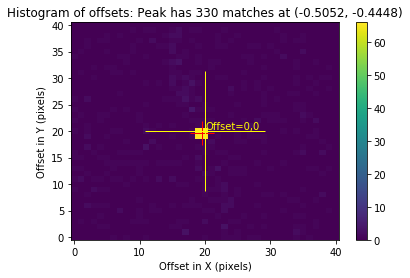

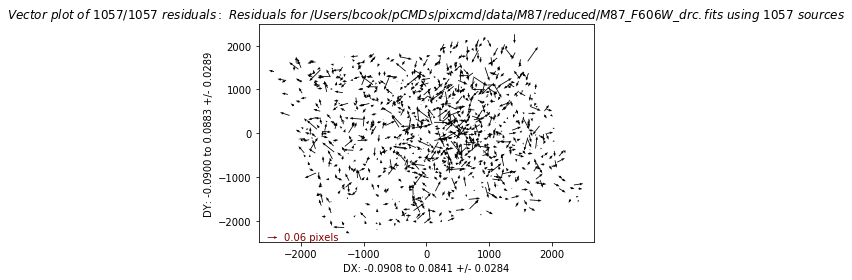

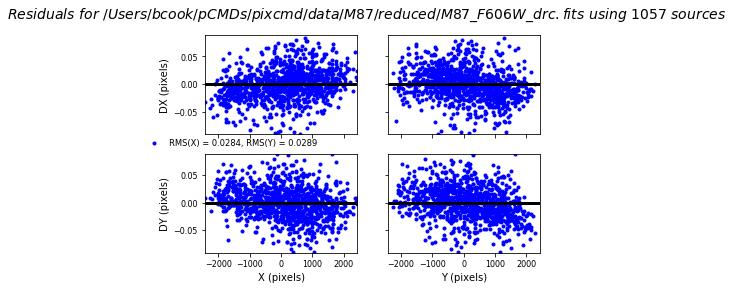

In [14]:
tweakreg.TweakReg([outputs['F814W'], outputs['F606W']], conv_width=4.0, threshold=100, nclip=10, shiftfile=False, writecat=False, clean=True,
                 interactive=False, updatehdr=False)

In [15]:
# Create difference image to check alignment
f1 = fits.open(outputs['F814W'])
f2 = fits.open(outputs['F606W'])
data = f2['SCI'].data / f1['SCI'].data
hdulist = fits.HDUList([fits.PrimaryHDU(), fits.ImageHDU(data=data)])
hdulist.writeto(diff_im, overwrite=True)

# Automatic Source Extraction

In [13]:
ppy.data.alignment._add_flag(outputs['F814W'], exp_ratio=0.925)
ppy.data.alignment._add_flag(outputs['F606W'], exp_ratio=0.925)

In [14]:
%%time
box = 8
ppy.data.sources.estimate_background(outputs['F814W'], bkg_kwargs={'bw':box, 'bh':box})

CPU times: user 1min 52s, sys: 4.11 s, total: 1min 56s
Wall time: 1min 59s


In [15]:
%%time
ppy.data.sources.mask_sources_auto(outputs['F814W'], threshold=10.0)

CPU times: user 3.5 s, sys: 4.32 s, total: 7.82 s
Wall time: 10.1 s


# Manual Source Extraction

In [16]:
ppy.data.sources.mask_sources_manual(outputs['F814W'], '../data/M87/masks/M87_F814W.reg')

In [17]:
# compute regions using only source masks
ppy.data.sources._add_masked(outputs['F814W'], mask_flags=[ppy.data.utils.ALL_FLAGS['SEXTRACTOR'],
                                                            ppy.data.utils.ALL_FLAGS['MANUAL']])

# Combine Masks

In [18]:
ppy.data.utils.combine_flags(outputs)

# Compute Regions

In [19]:
regions = ppy.data.extraction.add_regions(outputs, '../data/M87/masks/M87_F814W_contours.reg', base_filter='F814W', xc=2815, yc=2600)

100%|██████████| 91/91 [08:08<00:00,  5.36s/it]


# Extract PCMDs

In [20]:
pcmds = ppy.data.extraction.save_pcmds(outputs, 'F814W', 'F606W', path='../data/M87/pcmds/', name_append='M87_I_VI')

Filter: F814W
Observation Date: 53746 (MJD)
Vega ZeroPoint: 25.5274
AB ZeroPoint: 25.9556
ST ZeroPoint: 26.7919
Exposure Time: 2880.0
A pre-made filter is available
Filter: F606W
Observation Date: 53746 (MJD)
Vega ZeroPoint: 26.4187
AB ZeroPoint: 26.5116
ST ZeroPoint: 26.6808
Exposure Time: 3000.0
A pre-made filter is available


100%|██████████| 360/360 [00:50<00:00,  7.09it/s]


In [21]:
pcmds.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

# Check

In [9]:
pcmds = {}
for i in tqdm(range(1, 341)):
    filename = f'../data/M87/pcmds/M87_I_VI_{i}.pcmd'
    try:
        pcmds[i] = np.loadtxt(filename, unpack=True)
    except OSError:
        continue
    if len(pcmds[i]) == 0:
        pcmds.pop(i)
        os.remove(filename)

100%|██████████| 323/323 [00:19<00:00, 16.40it/s]


In [22]:
keys = np.array(list(pcmds.keys()))

In [23]:
keys

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [24]:
Neffs = {i: np.sqrt(pcmds[i].shape[1]) for i in pcmds.keys()}

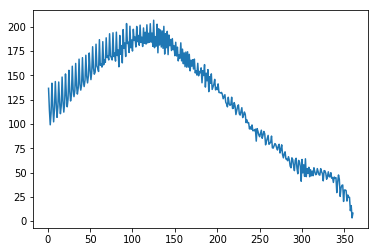

In [25]:
plt.plot(Neffs.keys(), Neffs.values())

In [26]:
f = ppy.instrument.default_m87_filters()
iso_model = ppy.isochrones.Isochrone_Model(f)

In [27]:
dmod = 31.0

In [28]:
ppy.distancemodels.dmod_to_mpc(dmod)

15.848931924611142

In [29]:
driv = ppy.driver.Driver(iso_model, gpu=False)

In [33]:
gal_3 = ppy.galaxy.SSPSimple(np.array([0., -2., 3., 10.]), dmod=dmod)
gal_4 = ppy.galaxy.SSPSimple(np.array([0., -2., 4., 10.]), dmod=dmod)
gal_5 = ppy.galaxy.SSPSimple(np.array([0., -2., 5., 10.]), dmod=dmod)
gal_6 = ppy.galaxy.SSPSimple(np.array([0., -2., 6., 10.]), dmod=dmod)

In [34]:
sky = [292.8, 377.1]

In [35]:
pcmd_3, _ = driv.simulate(gal_3, 256, sky_noise=sky)
pcmd_4, _ = driv.simulate(gal_4, 256, sky_noise=sky)
pcmd_5, _ = driv.simulate(gal_5, 256, sky_noise=sky)
pcmd_6, _ = driv.simulate(gal_6, 256, sky_noise=sky)

In [39]:
is_dark = False
for i in tqdm(np.unique((keys-1)//4)):
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 8), sharex=True, sharey=True)
    axes = [axes[0,1], axes[0,0], axes[1,0], axes[1,1]] # 4 quadrants
    for j in range(4):
        k = j + 1 + 4*i
        if k not in pcmds:
            continue
        pcmd = pcmds[k]
        if len(pcmd[0]) <= 10:
            continue
        ppy.plotting.plot_pcmd(pcmd, ax=axes[j])
        ppy.plotting.plot_pcmd_contours(pcmd_3, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        ppy.plotting.plot_pcmd_contours(pcmd_4, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        ppy.plotting.plot_pcmd_contours(pcmd_5, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        ppy.plotting.plot_pcmd_contours(pcmd_6, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        axes[j].set_title('Region {:d}, Neff = {:.0f}'.format(k, np.sqrt(pcmd.shape[1])))
        ppy.plotting.plot_isochrone(iso_model, dmod=30.25, axes=axes[j], mag_system='vega')
        axes[j].axhline(y=f[0].counts_to_mag(sky[0]), color='r', ls='--')
    axes[0].set_xlim([0, 3])
    axes[0].set_ylim([31, 22])
    plt.tight_layout()
    try:
        plt.savefig(f'figures/M87/M87_s{i}_pcmds.pdf')
    except TypeError:
        pass
    plt.close()

100%|██████████| 90/90 [02:02<00:00,  1.36s/it]
